# Titanic Survival

Import our Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

Load our Data

In [3]:
dftest = pd.read_csv(r'C:\Users\Sanjay\OneDrive\Desktop\Titanic\test.csv')

In [4]:
dfsurvive = pd.read_csv(r'C:\Users\Sanjay\OneDrive\Desktop\Titanic\gender_submission.csv')

In [5]:
dftrain = pd.read_csv(r'C:\Users\Sanjay\OneDrive\Desktop\Titanic\train.csv')

In [5]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
dfsurvive.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
dftrain.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Drop Columns with impertinent information

In [8]:
dftest=dftest.drop(['Name', 'Ticket'], axis = 1)

In [9]:
dftest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [10]:
dftrain=dftrain.drop(['Name', 'Ticket'], axis = 1)

In [11]:
dftrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


Deal with missing values by filling age with average value and dropping the Cabin column as approximately 75% have no value

In [12]:
dftrain.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
mean = (dftrain.Age.mean() + dftest.Age.mean()) / 2

In [14]:
dftrain['Age'].fillna(mean, inplace=True)

In [15]:
dftest['Age'].fillna(mean, inplace=True)

In [16]:
dftrain = dftrain.drop(['Cabin'], axis=1)

In [17]:
dftest = dftest.drop(['Cabin'], axis=1)

Label Encoding Sex Column

In [18]:
le = preprocessing.LabelEncoder()
dftrainsex = le.fit_transform(dftrain['Sex'])

In [19]:
dftrain['SexLabel'] = dftrainsex

In [20]:
dftrain.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexLabel
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1


In [21]:
dftestsex = le.fit_transform(dftest['Sex'])

In [22]:
dftest['SexLabel'] = dftestsex

In [23]:
dftest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexLabel
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,0
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,0


In [24]:
dftrain.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
dftest.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
SexLabel       0
dtype: int64

In [26]:
dftrain['Embarked'].fillna('S', inplace=True)

One Hot Encoding Embarked Column

In [27]:
dftrain.Embarked = dftrain.Embarked.astype('category')

In [28]:
EmbarkedLabel = pd.get_dummies(dftrain.Embarked, prefix ='Embarked')

In [29]:
EmbarkedLabel.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [30]:
dftrain = dftrain.join([EmbarkedLabel])

In [31]:
dftest.Embarked = dftest.Embarked.astype('category')

In [32]:
EmbarkedLabel2 = pd.get_dummies(dftest.Embarked, prefix ='Embarked')

In [33]:
dftest = dftest.join([EmbarkedLabel2])

In [34]:
dftest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexLabel,Embarked_C,Embarked_Q,Embarked_S
0,892,3,male,34.5,0,0,7.8292,Q,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,0,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,0,1


In [35]:
dftrain.Pclass = dftrain.Pclass.astype('category')

In [36]:
Pclass = pd.get_dummies(dftrain.Pclass, prefix ='Pclass')

In [37]:
Pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [38]:
dftrain = dftrain.join([Pclass])

In [39]:
dftest.Pclass = dftest.Pclass.astype('category')

In [40]:
Pclass2 = pd.get_dummies(dftest.Pclass, prefix ='Pclass')

In [41]:
dftest = dftest.join([Pclass2])

In [42]:
dftest.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SexLabel,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,3,male,34.5,0,0,7.8292,Q,1,0,1,0,0,0,1
1,893,3,female,47.0,1,0,7.0000,S,0,0,0,1,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,1,0,1,0,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,1,0,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,0,0,0,1,0,0,1


In [43]:
faremean = dftest.Fare.mean()

In [44]:
dftest['Fare'].fillna(faremean, inplace=True)

In [45]:
dftest =dftest.drop(['Sex', 'Embarked', 'Pclass'], axis = 1)

In [46]:
dftrain =dftrain.drop(['Sex', 'Embarked', 'Pclass'], axis = 1)

In [47]:
dftest.head()

,PassengerId,Age,SibSp,Parch,Fare,SexLabel,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,1,0,1,0,0,0,1
1,893,47.0,1,0,7.0000,0,0,0,1,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,0,0,1,0
3,895,27.0,0,0,8.6625,1,0,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,0,1,0,0,1


Executing Decision Tree

In [48]:
feature_cols = ['SexLabel', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3']

X = dftrain[feature_cols]
y = dftrain.Survived

In [49]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
y_pred = clf.predict(dftest[feature_cols])

In [50]:
print("Accuracy:",metrics.accuracy_score(dfsurvive['Survived'], y_pred))

Accuracy: 0.7942583732057417


In [51]:
submission = pd.DataFrame({'PassengerId':dftest['PassengerId'], 'Survived':y_pred})

In [52]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [53]:
filename = 'Predictions.csv'



In [54]:
submission.to_csv(filename, index = False)

Decision Tree Visualization 

In [55]:
dot_data = StringIO()

In [56]:
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names = ['0', '1'])

In [57]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [58]:
graph.write_png('TitanicTree.png')

True

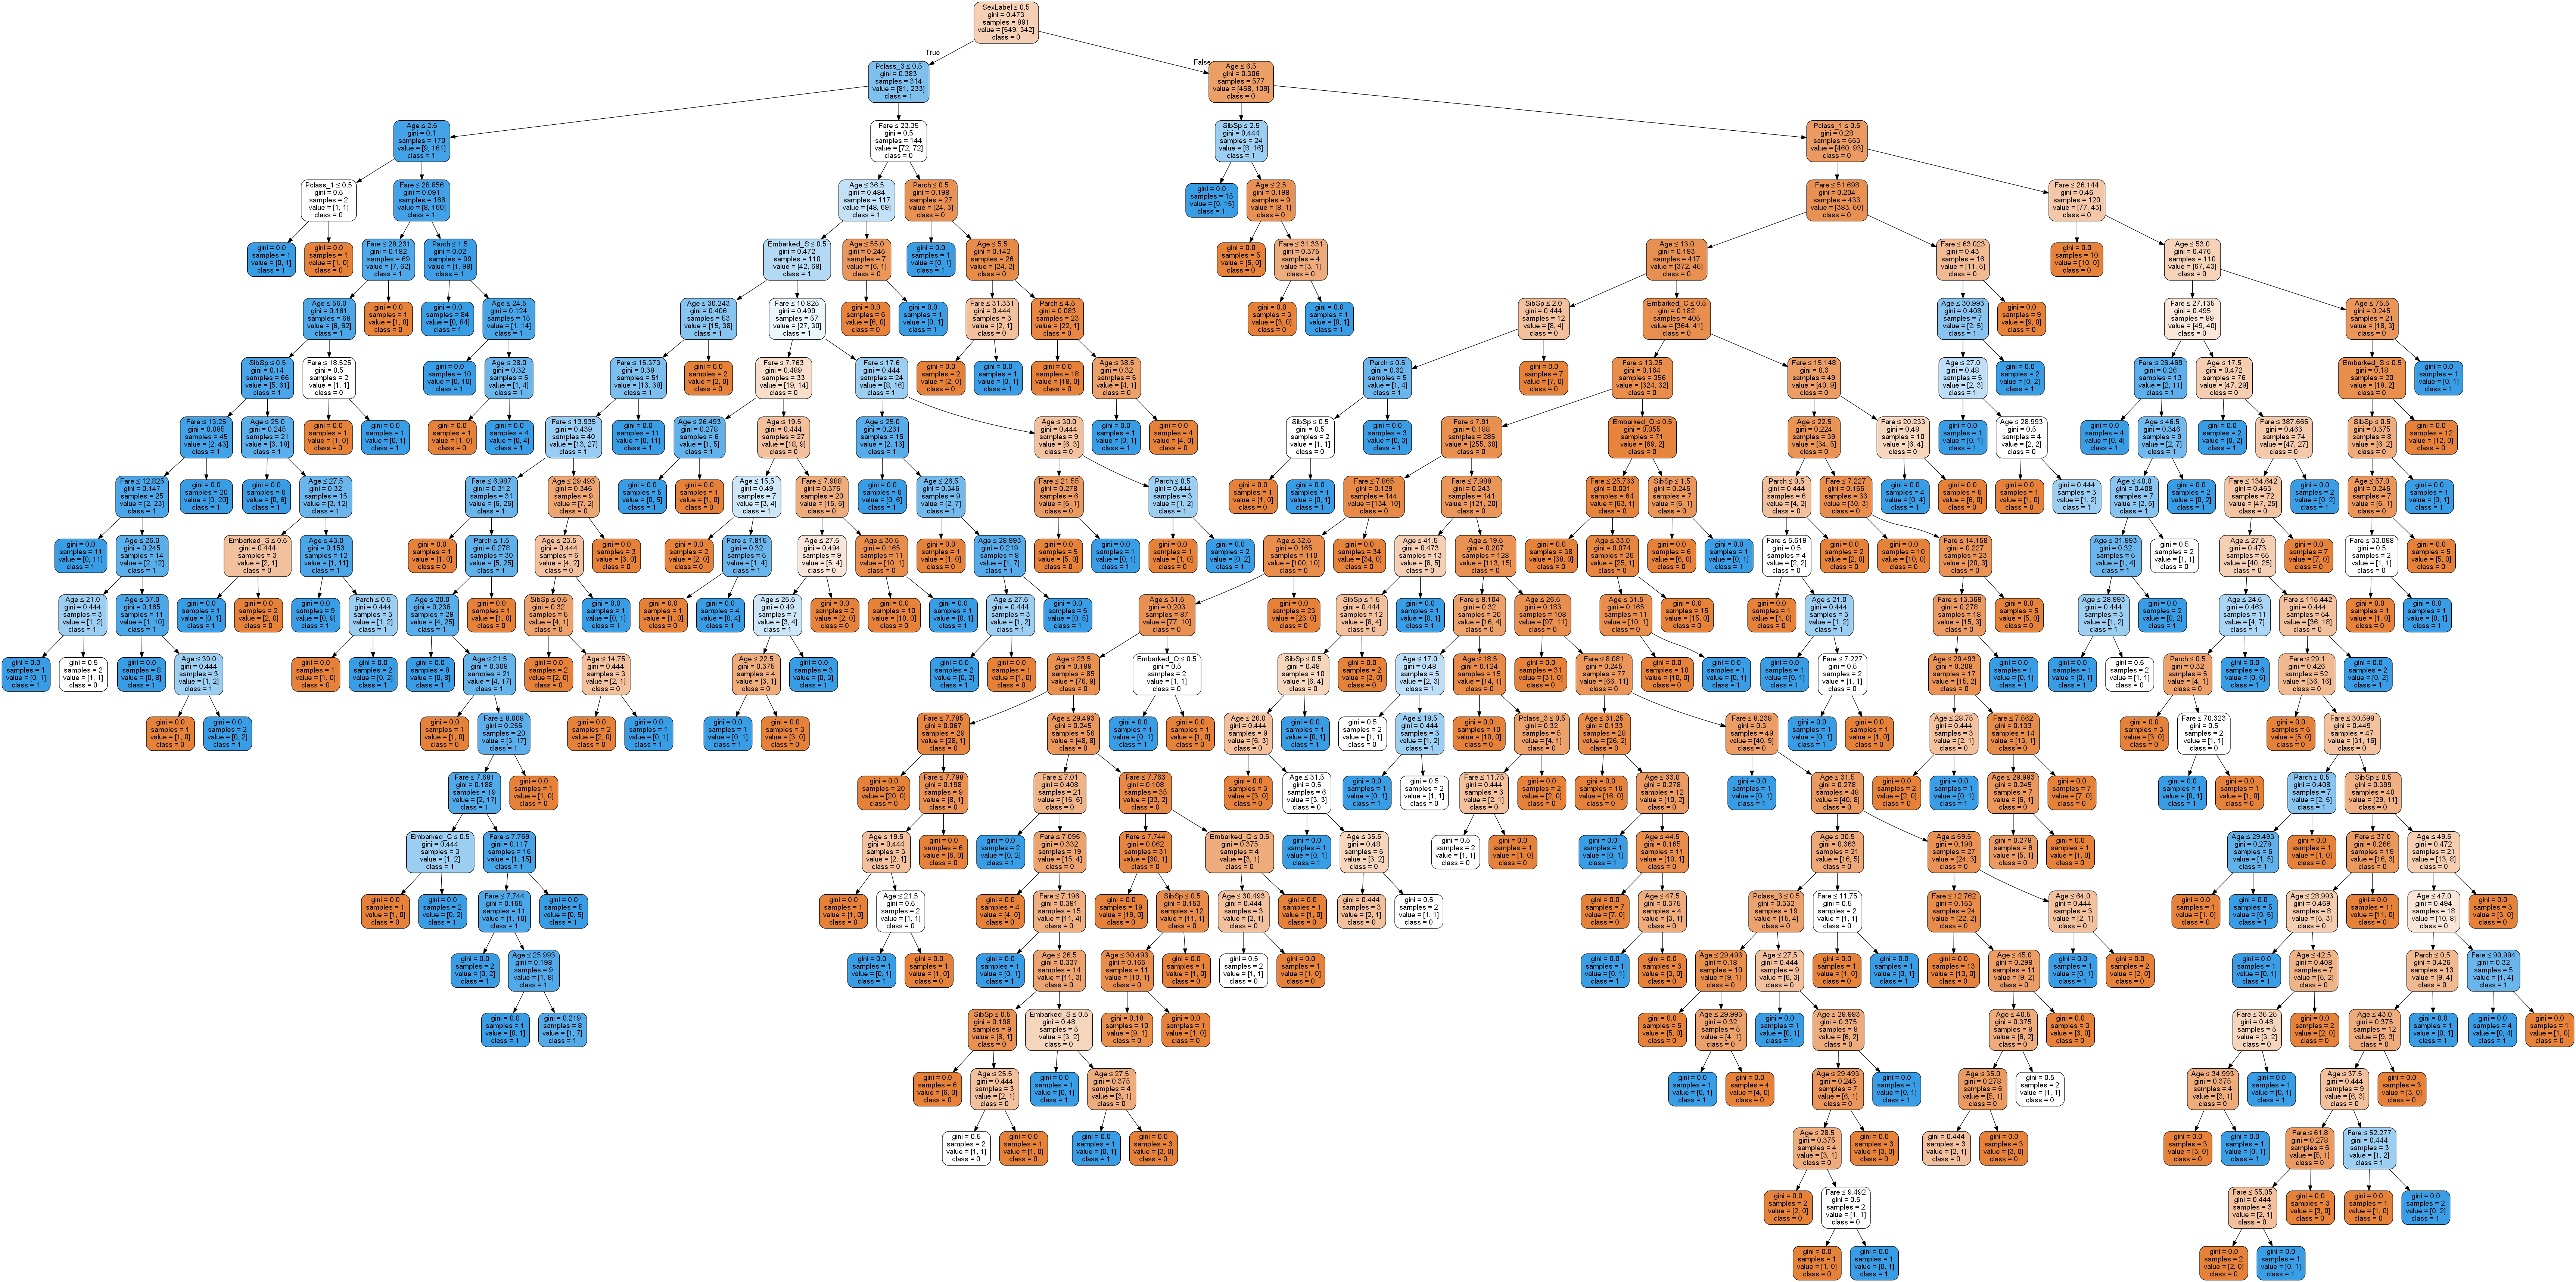

In [59]:
Image(graph.create_png())

In [60]:
kaggle competitions submit -c titanic -f Predictions.csv -m "Message"

SyntaxError: invalid syntax (<ipython-input-60-7652998a8790>, line 1)